Load Dataset from kaggle

In [109]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")



In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


In [111]:
df=pd.read_csv(path + "/country-data.csv")
df_info=pd.read_csv(path + "/data-dictionary.csv")

In [112]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [113]:
df_info

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


Information About Data

In [114]:
df.shape

(167, 10)

In [115]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [117]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [118]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [119]:
df.duplicated().sum()

np.int64(0)

From above analysis, we can understand that the data is clean. There are no null and duplicate values. Now we can further proceed to EDA.

Exploratory Data Analysis

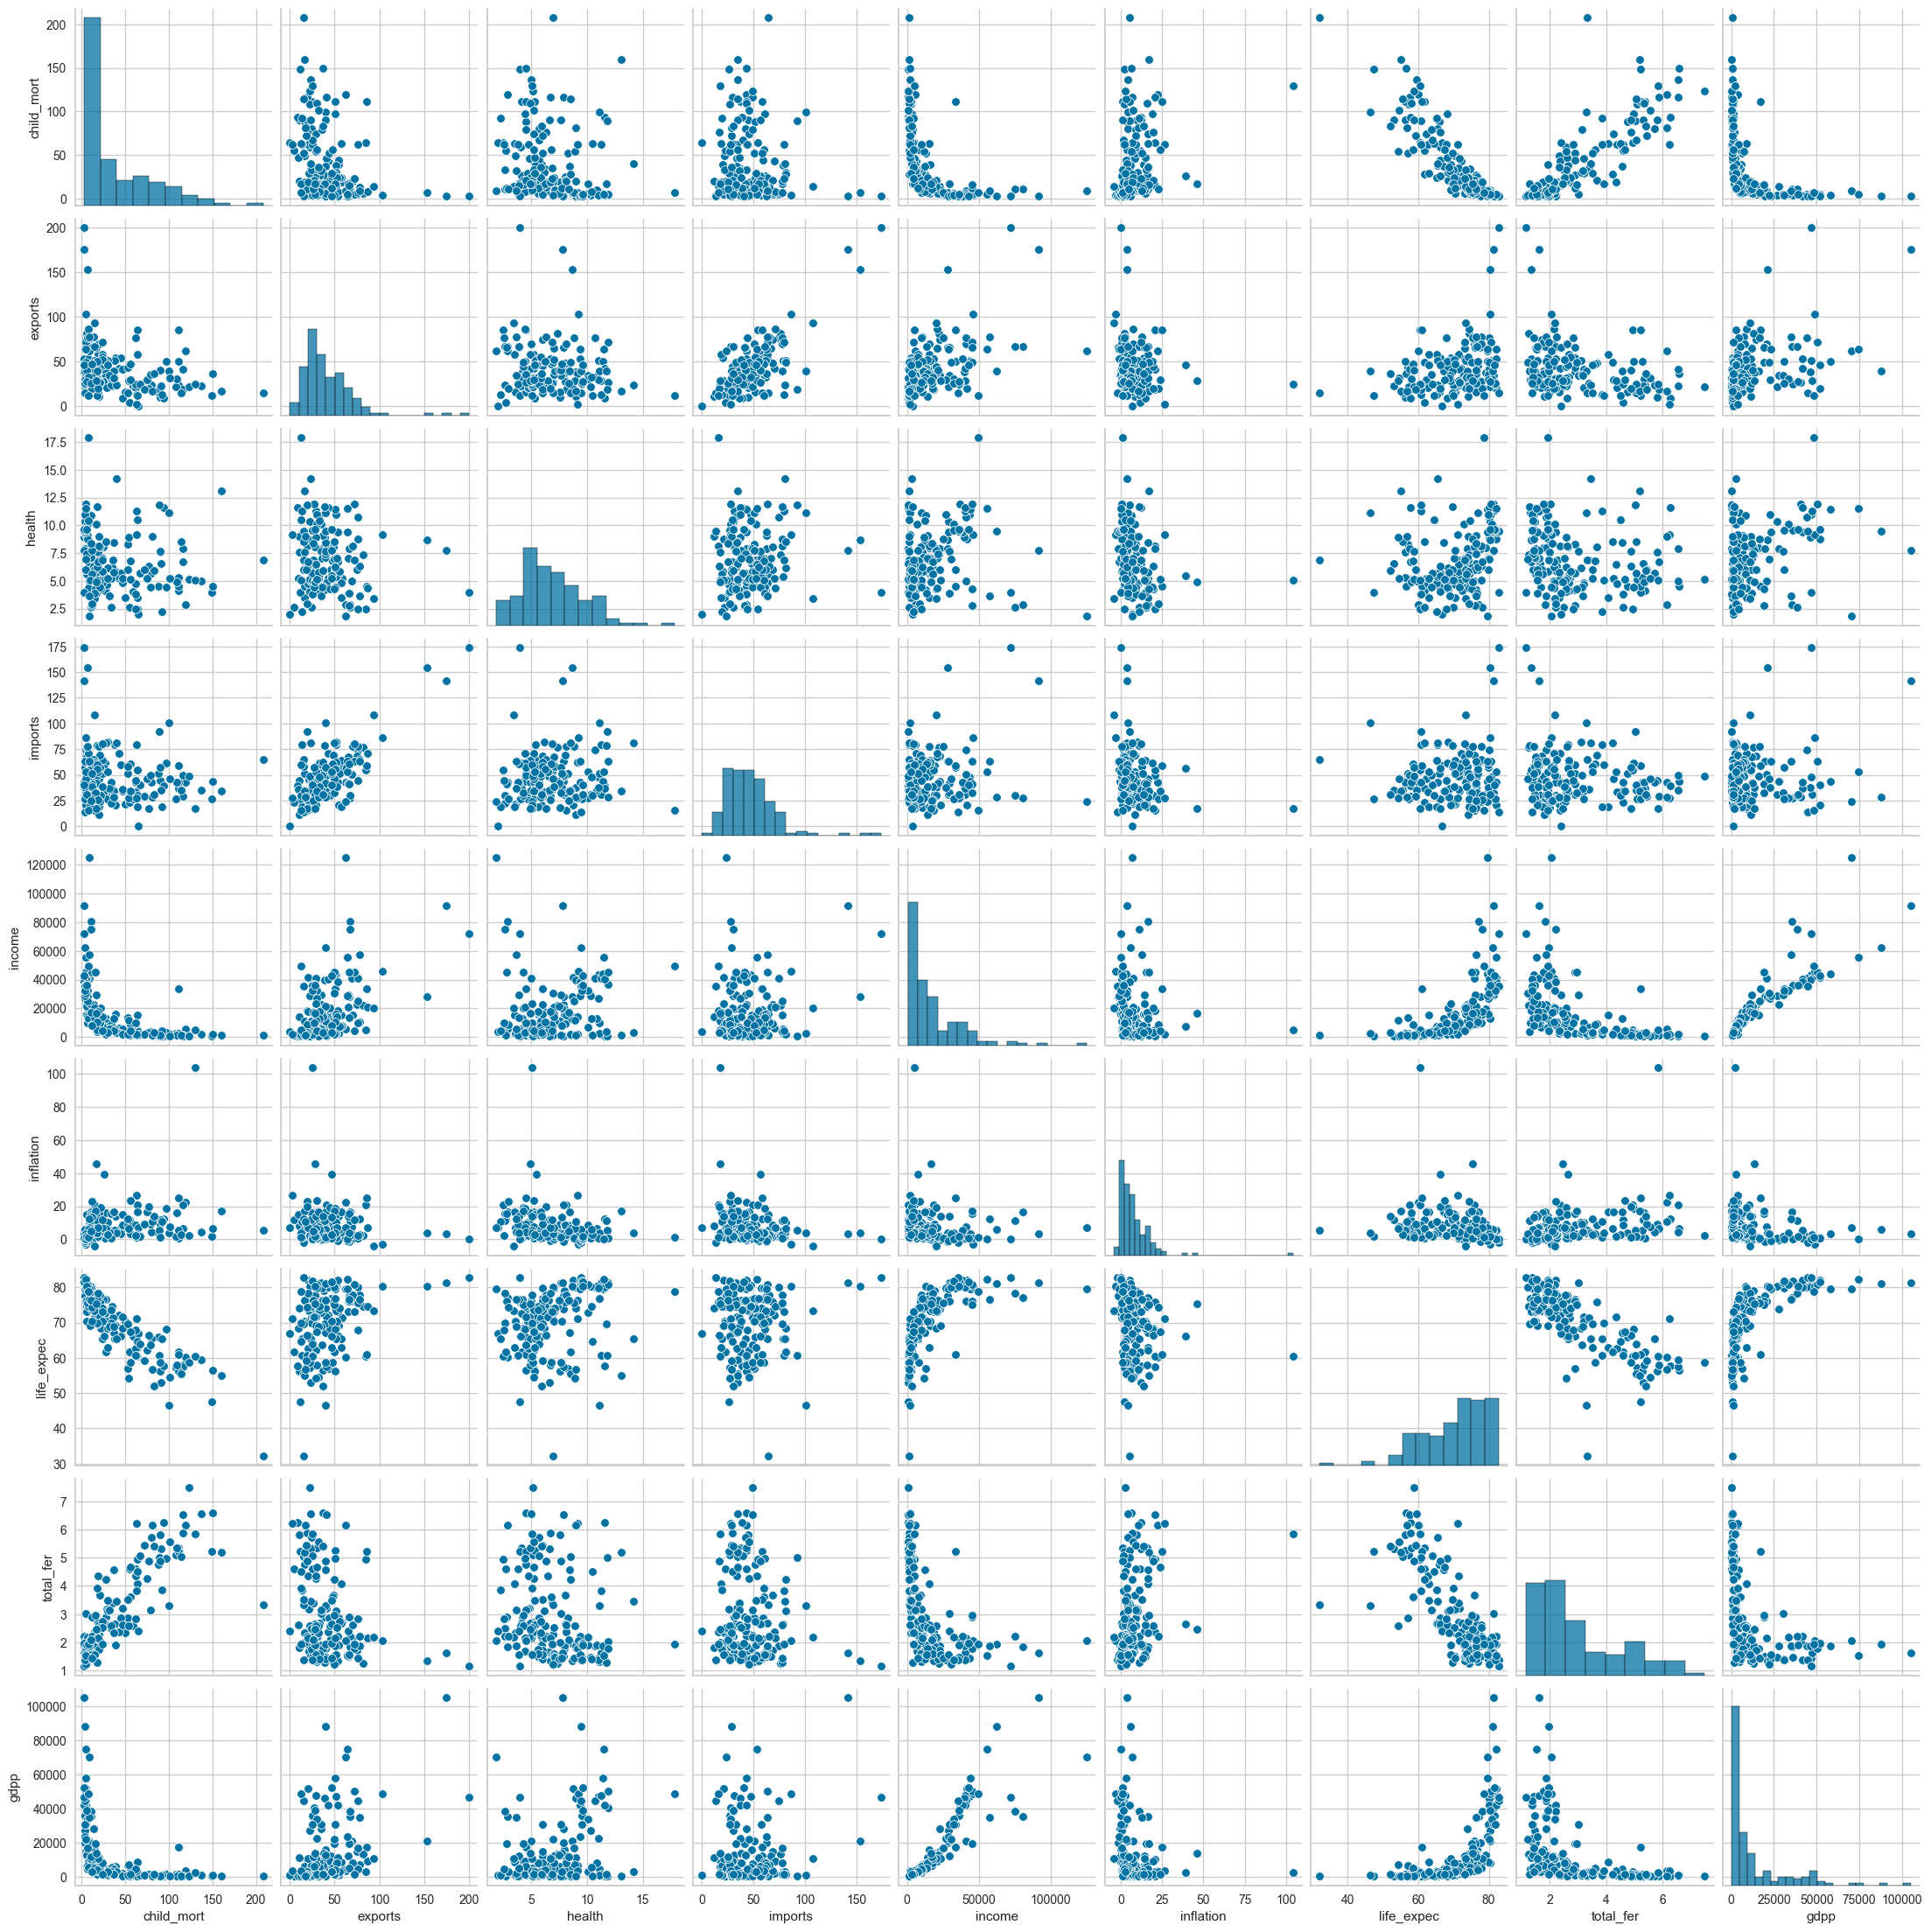

In [120]:
sns.pairplot(df)
plt.show()


Above we can find that there are some outliers in each case. So we will need to remove those outliers so there won't be any problems in future. Now our main goal will be what technique to use to remove those outliers.

In [121]:
numerical_col=df.select_dtypes(include=[np.number]).columns.tolist()
categorical_col=df.select_dtypes(exclude=[np.number]).columns.tolist()

In [122]:
numerical_col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [123]:
categorical_col

['country']

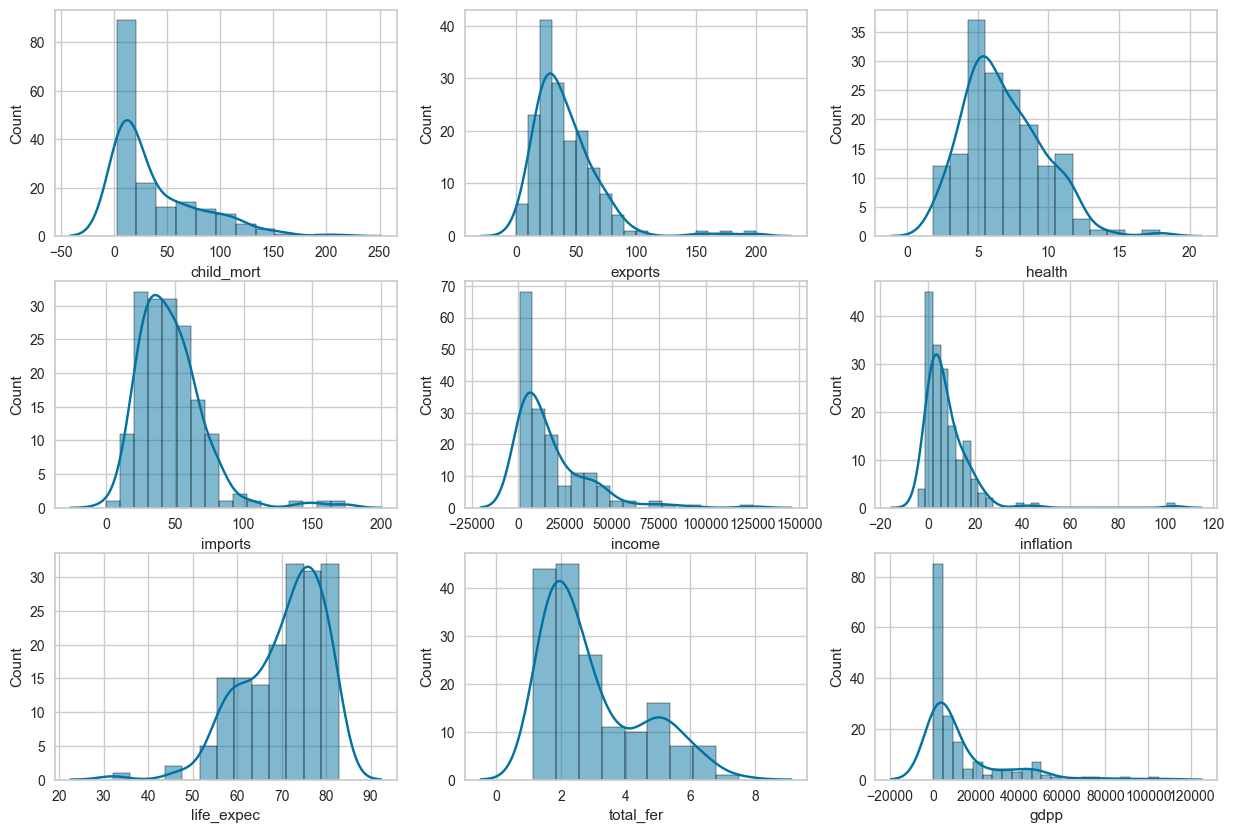

In [124]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,10))
axes=axes.flatten()
for i in range(len(numerical_col)):
    sns.histplot(df[numerical_col[i]],ax=axes[i],kde=True,kde_kws={'cut': 3})

plt.show()


Most of the data distribution are seen as right skewed(Positively Skewed) and some are seen as left skewed. If necessary we can apply log/sqrt to normalize right skew and inverse/exp for left skew.

In [125]:
df[numerical_col].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


<Axes: >

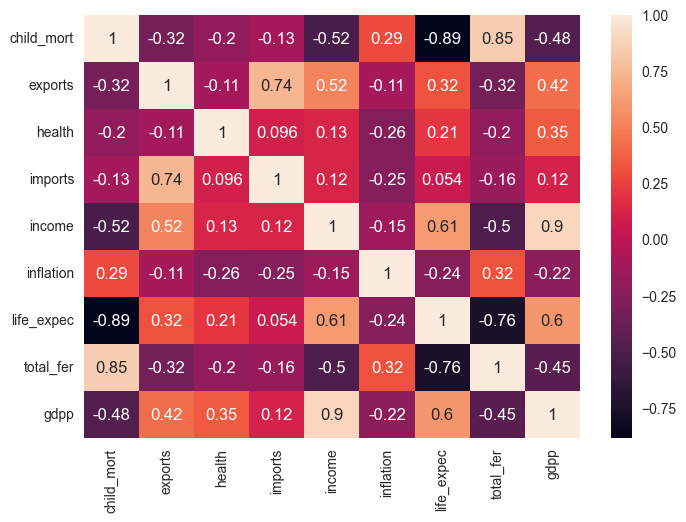

In [126]:
sns.heatmap(df[numerical_col].corr(),annot=True)

Highly correlated data needs to be removed to prevent overrfitting(depending upon the case). Above figure shows:
1. life_expec is highly correlated with child_mort.
2. total-fer is highly correlated with child_mort.
3. income is highly correlated with gdpp 

In [127]:
##GDP Per Capita
cat=['High','Medium','Low']

df.sort_values(by='gdpp',ascending=False)



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.00,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.70,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000
...,...,...,...,...,...,...,...,...,...,...
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327


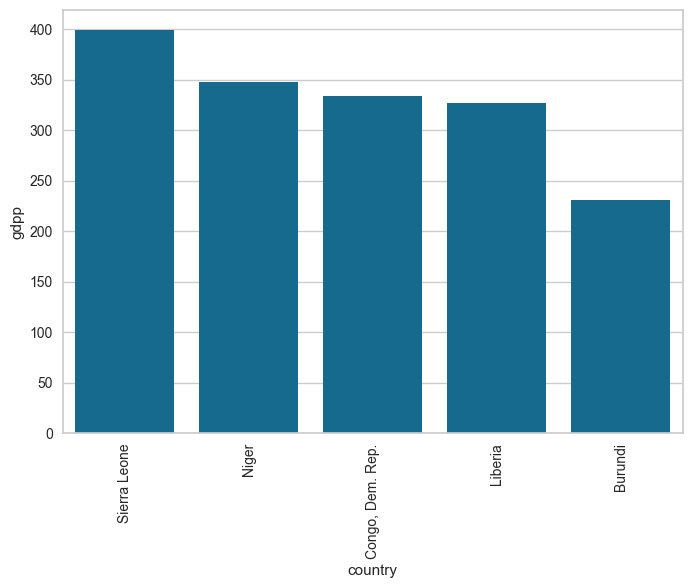

In [128]:

sns.barplot(x='country',y='gdpp',data=df.sort_values(by='gdpp',ascending=False).iloc[-5:])
plt.xticks(rotation=90) 
plt.show()

Lets visualize top 5 country for each features. For this we can use the seaborn plot as below

In [129]:
def visualize(feature):
    fig,ax=plt.subplots(1,3,figsize=(16,4))
    sns.barplot(x="country",y=feature,data=df.sort_values(by=feature,ascending=False).iloc[:5],ax=ax[0])
    sns.barplot(x="country",y=feature,data=df.sort_values(by=feature,ascending=False).iloc[80:85],ax=ax[1])
    sns.barplot(x="country",y=feature,data=df.sort_values(by=feature,ascending=False).iloc[-5:],ax=ax[2])

    for i in range(3):
        title=cat[i] + ' ' + feature
        ax[i].set_title(title)
        ax[i].tick_params(axis='x', labelrotation=60)
        mainTitle=feature + ' '+'vs' +' '+ 'Country'
    fig.suptitle(mainTitle, fontsize=16)

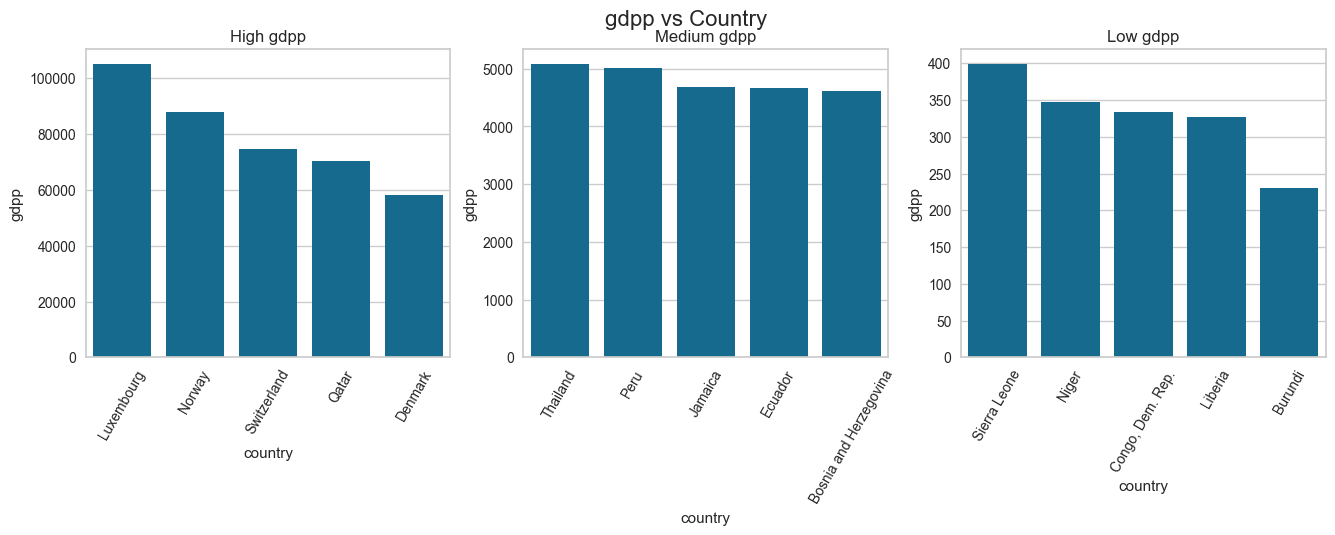

In [130]:
visualize('gdpp')
plt.show()

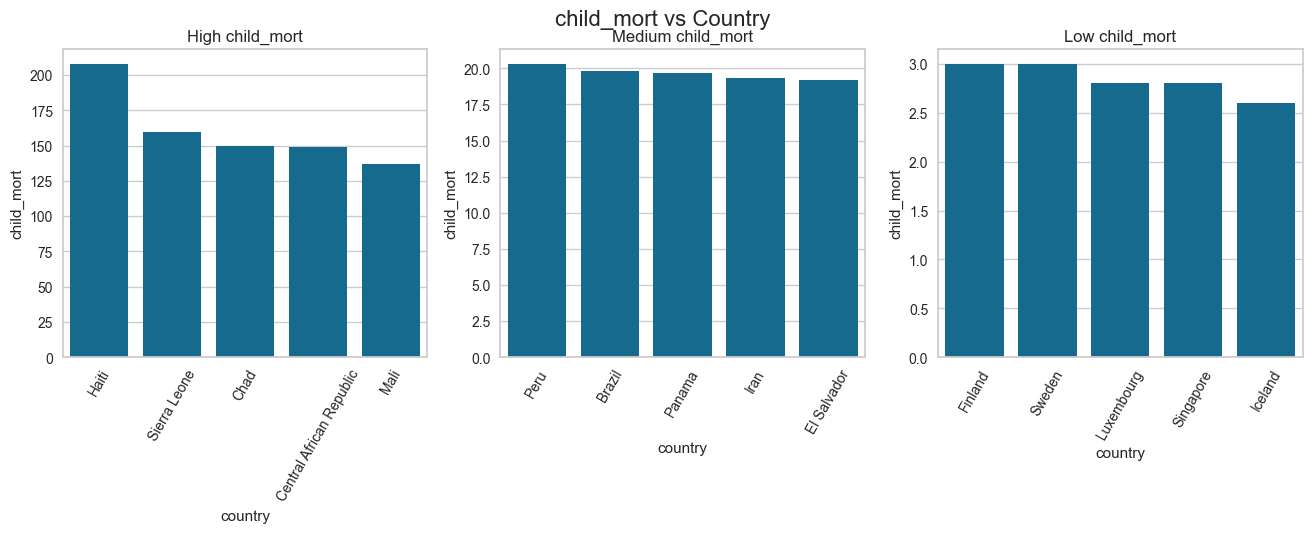

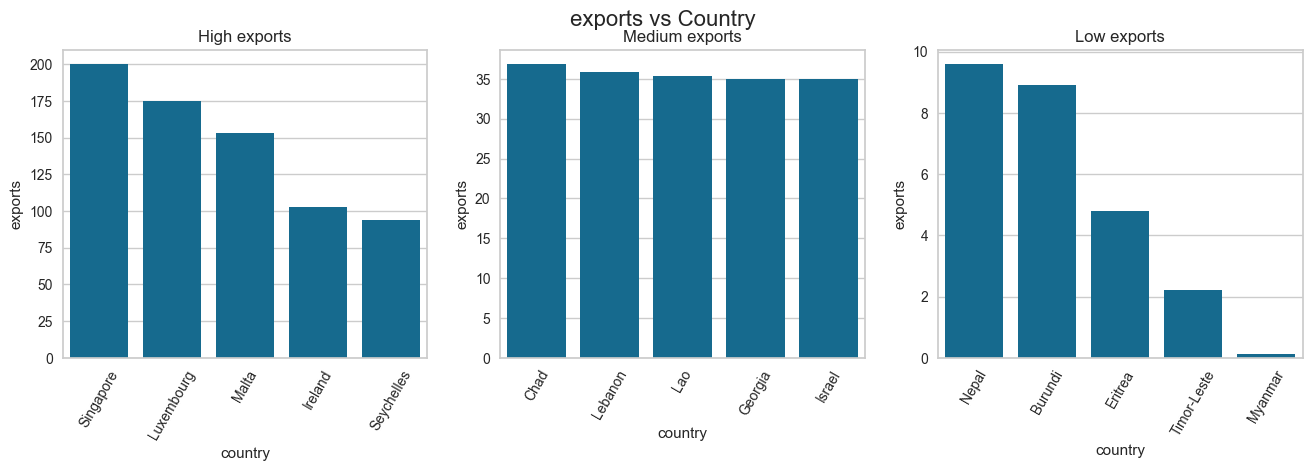

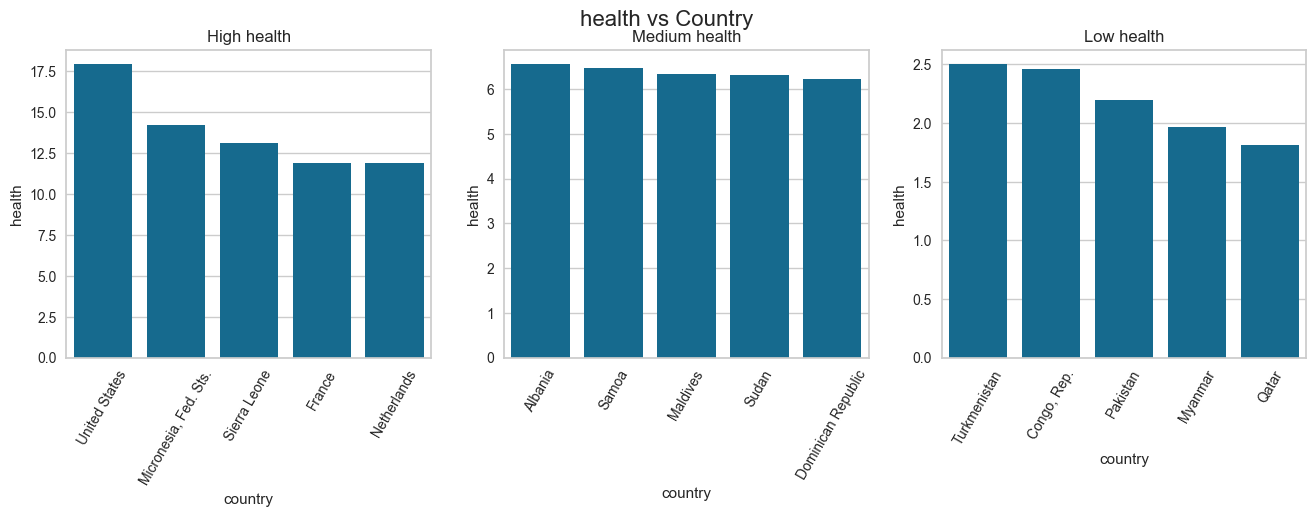

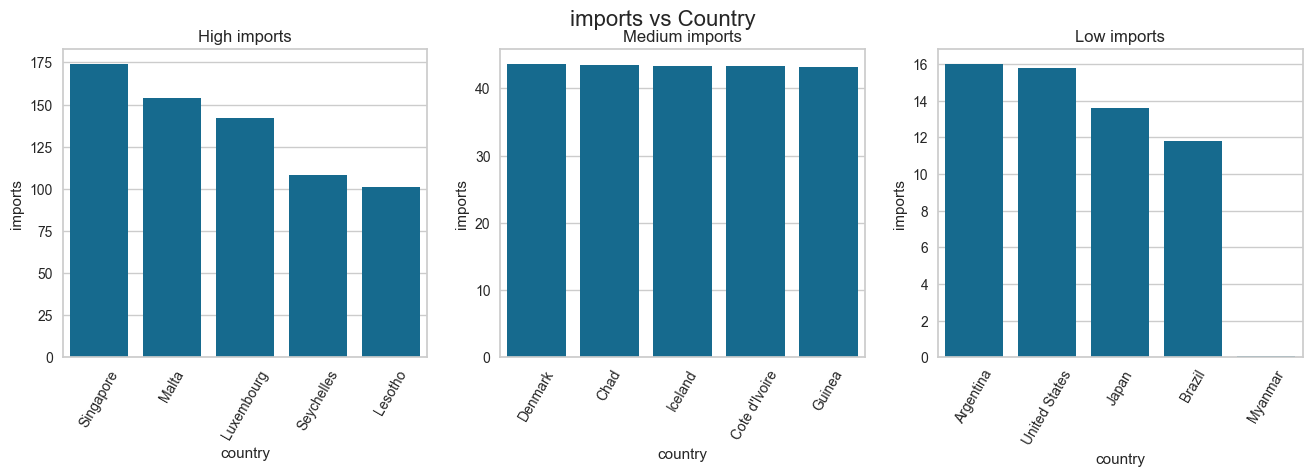

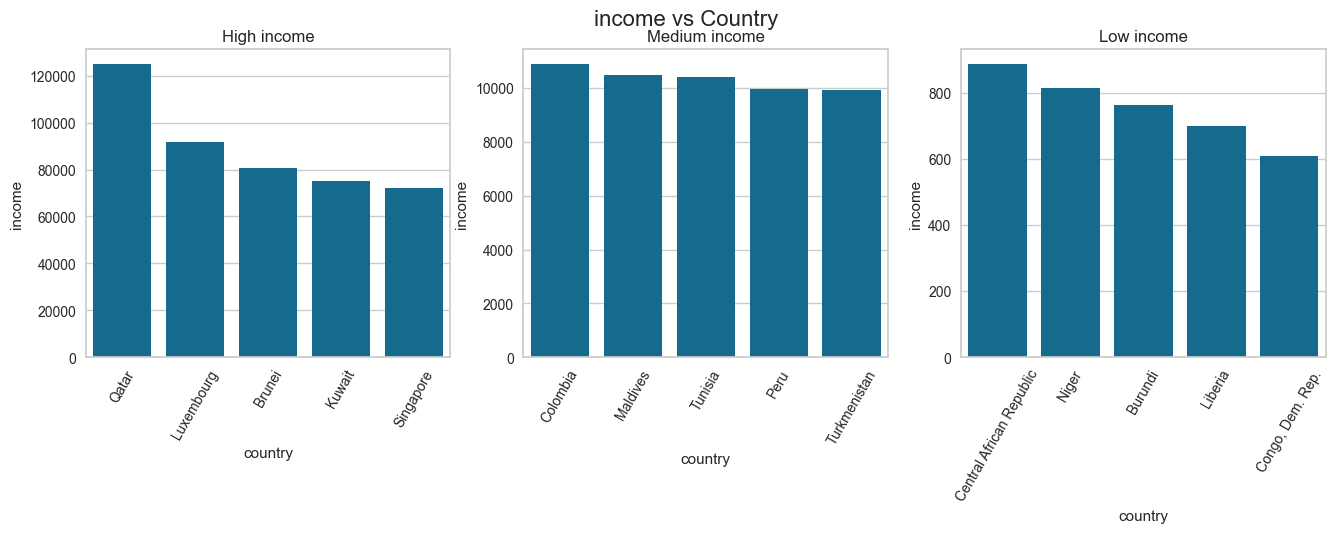

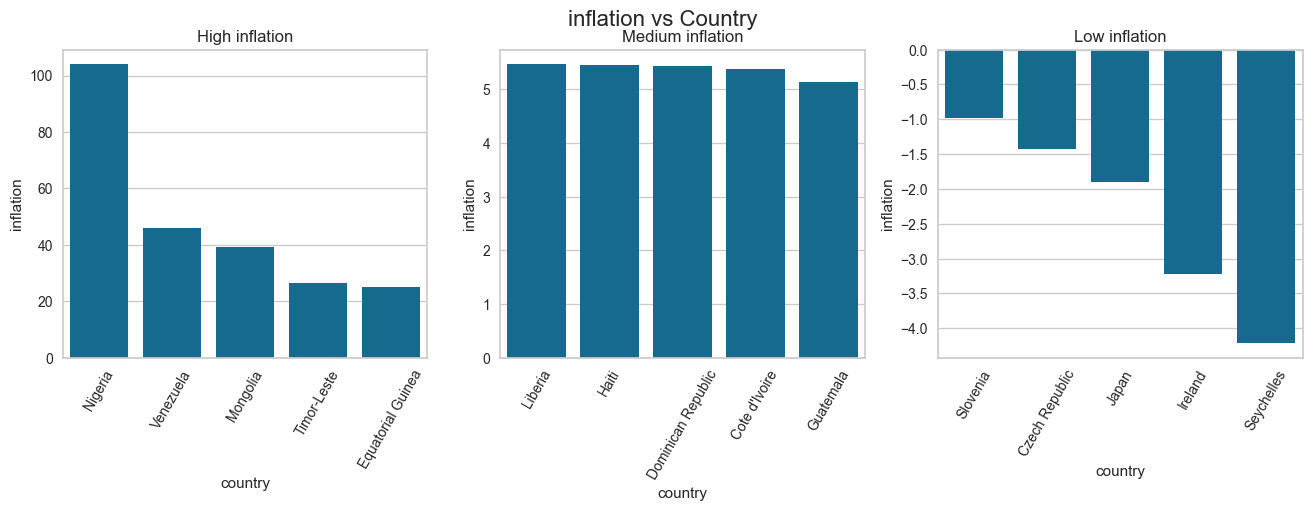

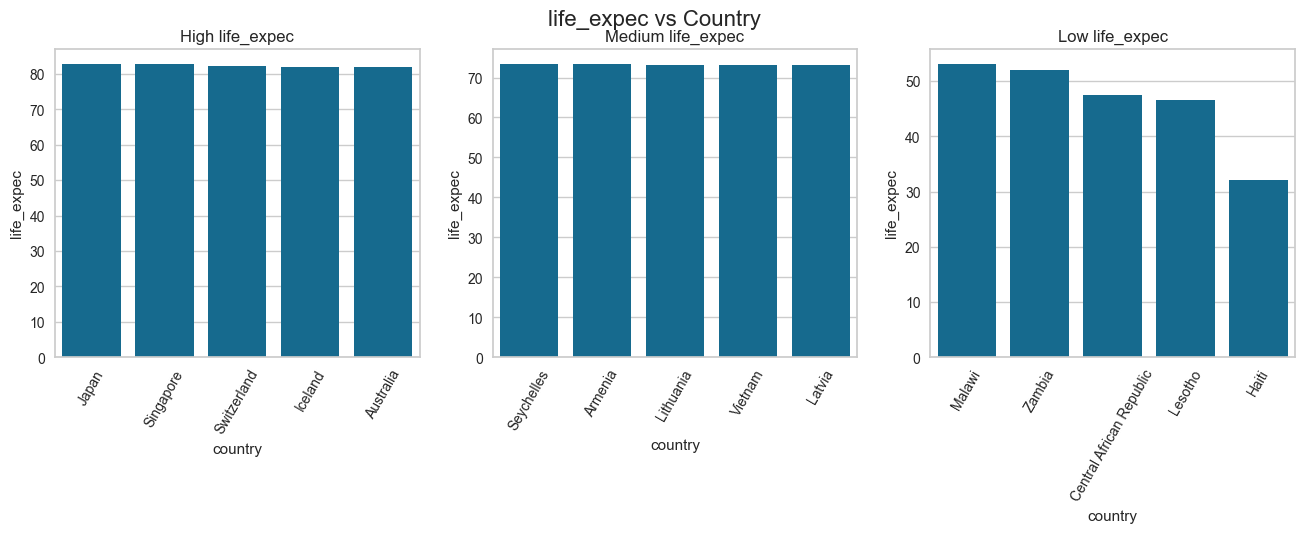

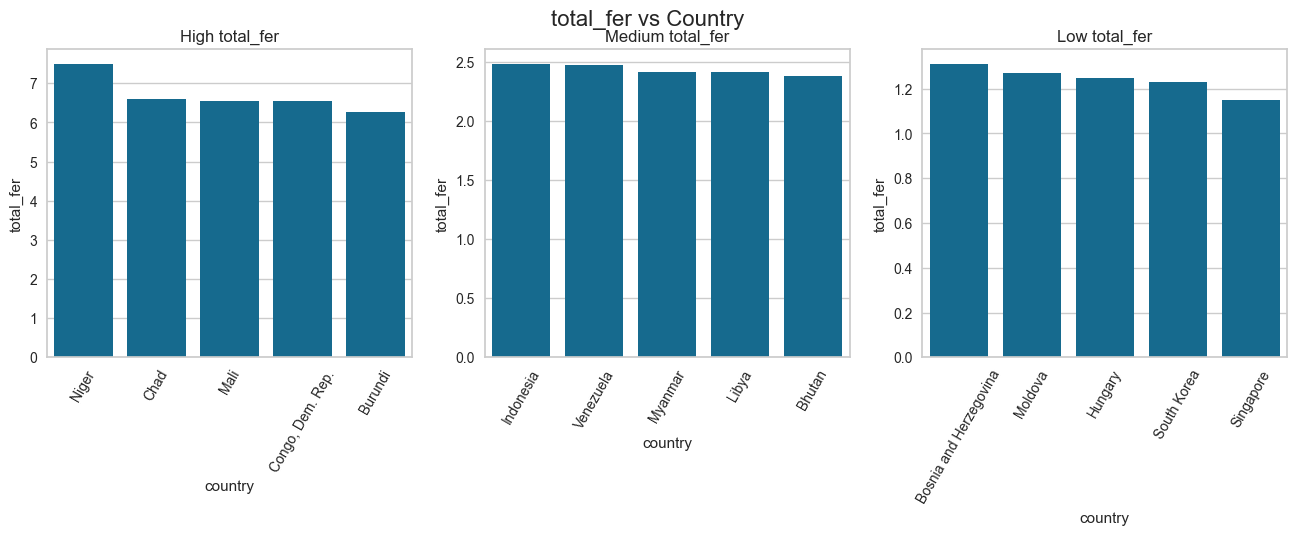

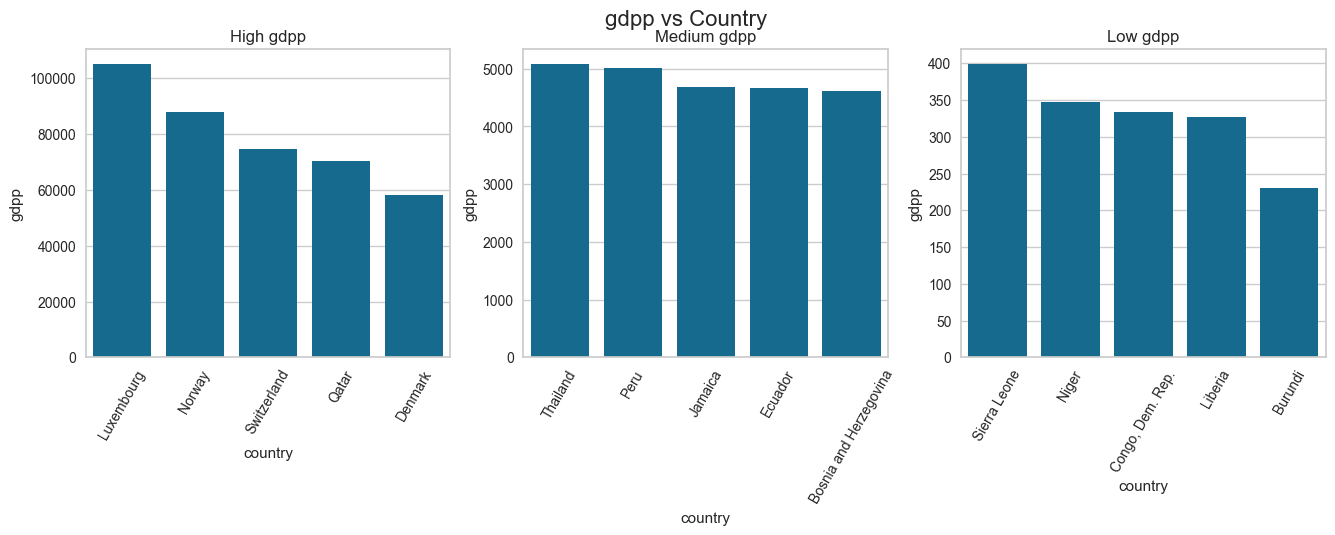

In [131]:
for i in numerical_col:
    visualize(i)

Now as per problem statement we have to find which countries need financial aid. From our given fetures we need to give financial aid to those country who has following features:

Child Mortality Rate (child_mort)
➤ High values show poor healthcare, malnutrition, and unsanitary conditions.

GDP per Capita (gdpp)
➤ Low GDP per person reflects overall economic weakness and low standard of living.

Average Income (income)
➤ Low income indicates poverty and limited access to resources and services.

Life Expectancy (life_expec)
➤ Short life spans often mean poor healthcare and harsh living conditions.

Health Expenditure (% of GDP) (health)
➤ Low health investment suggests insufficient medical facilities and services.

Boxplot for Univariate Analysis

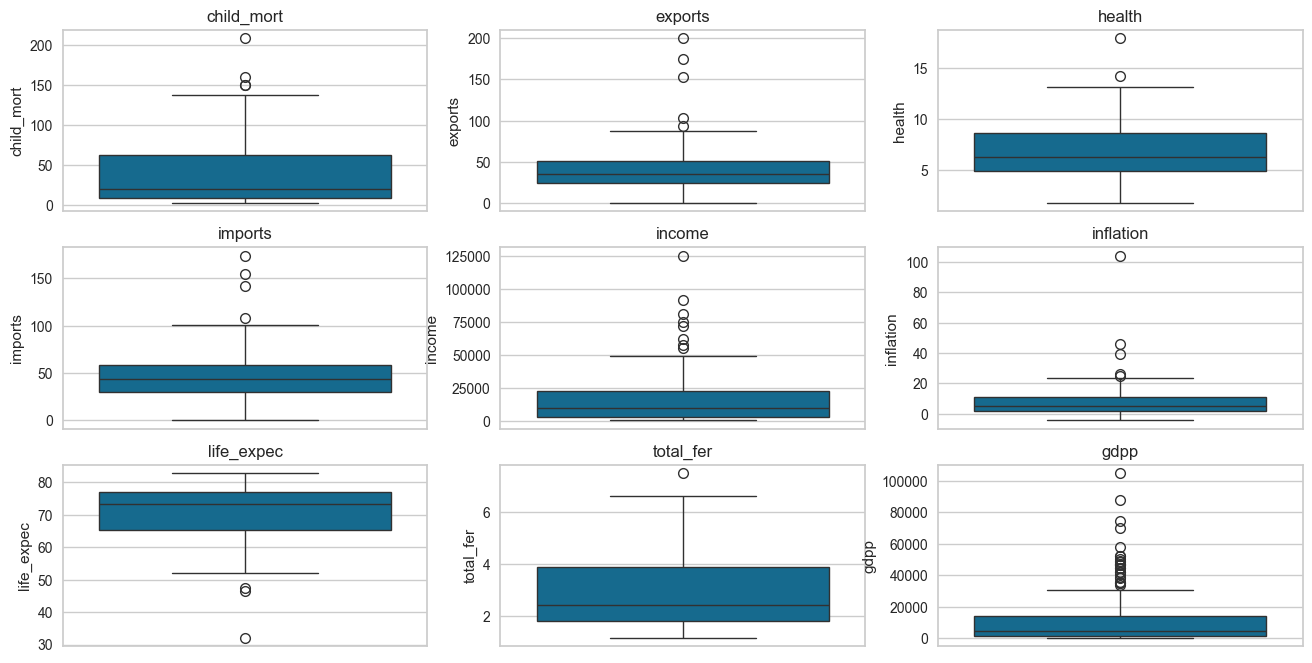

In [132]:
fig,ax=plt.subplots(3,3,figsize=(16,8))
ax=ax.flatten()
for i,col in enumerate(numerical_col):
    sns.boxplot(y=col,data=df,ax=ax[i])
    ax[i].set_title(col)
plt.show()

Here we can see that there are many outliers in gdpp. We can remove those countries as higher gdpp means those country are not in need of any such aids.

In [133]:
indexes=np.where(df['gdpp']>35000)
print(len(indexes[0]))

23


Feature Engineering

In [134]:
data=df.copy()

In [135]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [136]:
data[numerical_col]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [137]:
# scaler=MinMaxScaler()
scaler=StandardScaler()

In [138]:
df_minmax=scaler.fit_transform(data[numerical_col])

In [139]:
df_minmax=pd.DataFrame(df_minmax,columns=numerical_col)

In [140]:
df_minmax.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [141]:
pca=PCA(svd_solver='auto')
pca

PCA()

In [142]:
pca_df=pd.DataFrame(pca.fit_transform(df_minmax),columns=numerical_col)

In [143]:
pca_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0.254597,-0.383000,-0.415076,0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,-0.084579,-0.248919,0.221042,-0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0.401696,0.087214,0.184162,-0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0.547996,0.440835,0.355998,0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,0.206919,-0.241978,0.023681,-0.094270


In [144]:
var_per=np.round(pca.explained_variance_ratio_*100,decimals=2)

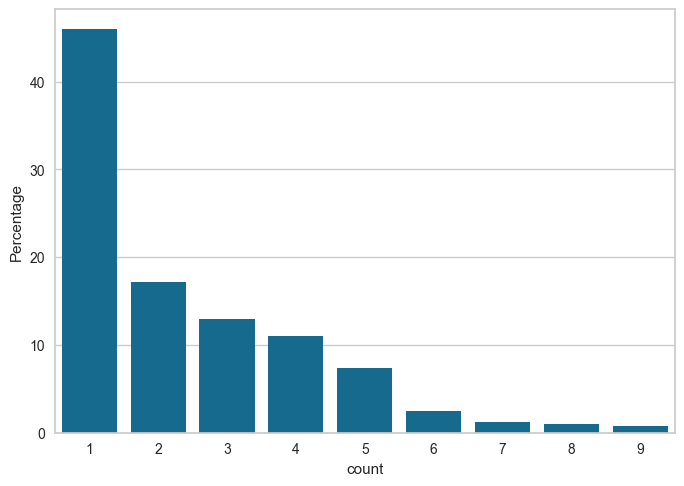

In [145]:
sns.barplot(x=list(range(1, len(var_per)+1)),y=var_per)
plt.xlabel('count')
plt.ylabel('Percentage')
plt.show()

We know that the main purpose of pca is to reduce dimensionality. From above figure we can see the exponential decreaase after 4. So we can take 4 principal components

In [146]:
label=['PC'+str(i) for i in range(1,len(var_per)+1)]
pca_df.columns=label
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0.254597,-0.383000,-0.415076,0.014148
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,-0.084579,-0.248919,0.221042,-0.173316
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,0.401696,0.087214,0.184162,-0.084037
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0.547996,0.440835,0.355998,0.091339
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,0.206919,-0.241978,0.023681,-0.094270


In [147]:
pca_df=pca_df[['PC1','PC2','PC3','PC4',]]
pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063


K-Means Clustering

Lets first practice without PCA

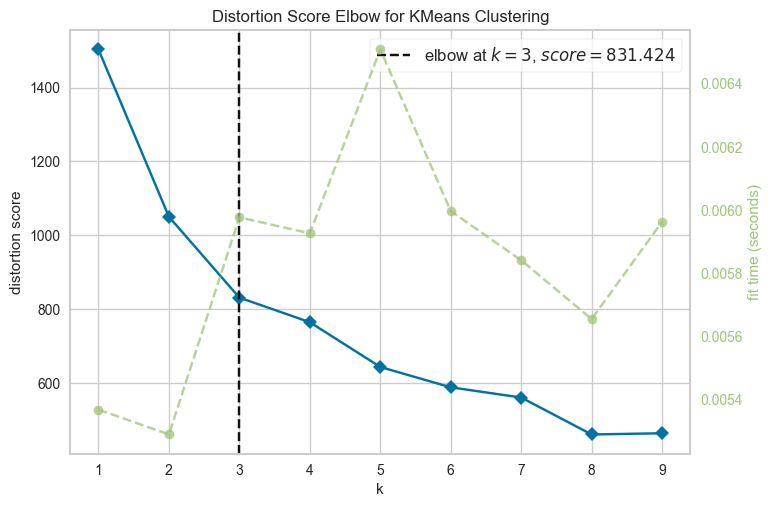

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [148]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(df_minmax)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Now We can take 3 clusters mean(k=3).

In [149]:
model=KMeans(n_clusters=3,random_state=42)
model.fit(df_minmax)

KMeans(n_clusters=3, random_state=42)

In [150]:
model.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [151]:
df['kMeans_labels']=model.labels_

In [152]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kMeans_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


<Axes: xlabel='exports', ylabel='income'>

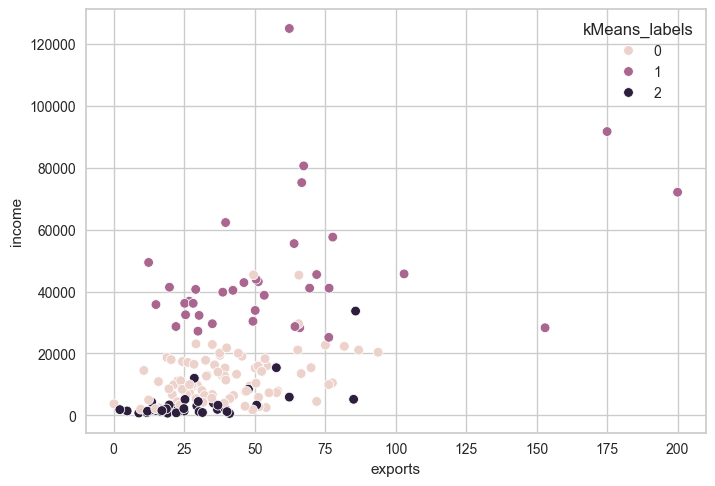

In [153]:
sns.scatterplot(x='exports',y='income',hue='kMeans_labels',data=df)

<Axes: xlabel='child_mort', ylabel='income'>

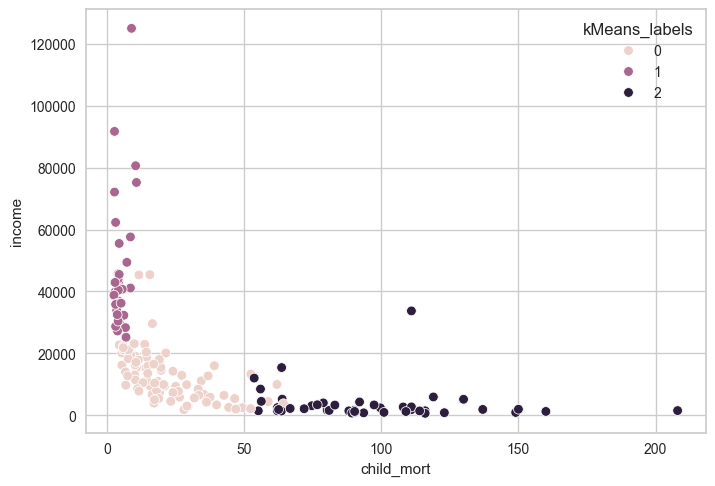

In [154]:
sns.scatterplot(x='child_mort',y='income',hue='kMeans_labels',data=df)

<Axes: xlabel='child_mort', ylabel='health'>

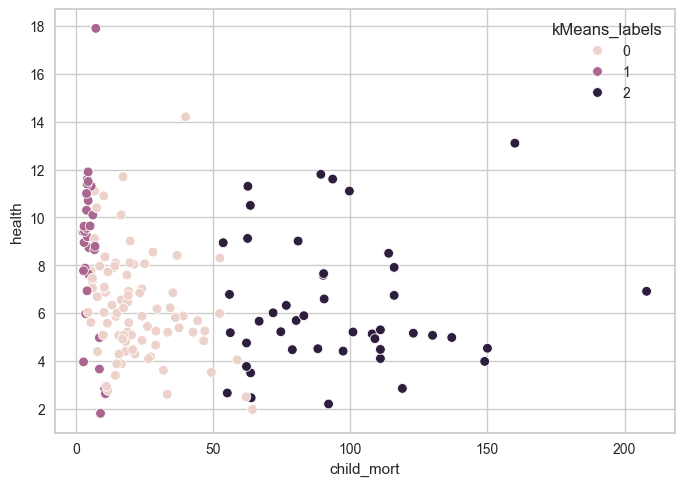

In [155]:
sns.scatterplot(x='child_mort',y='health',hue='kMeans_labels',data=df)

In [156]:
df.groupby(['kMeans_labels',df['country']]).mean()

child_mort  exports  health  imports  \
kMeans_labels country                                                     
0             Albania                    16.6     28.0    6.55     48.6   
              Algeria                    27.3     38.4    4.17     31.4   
              Antigua and Barbuda        10.3     45.5    6.03     58.9   
              Argentina                  14.5     18.9    8.10     16.0   
              Armenia                    18.1     20.8    4.40     45.3   
...                                       ...      ...     ...      ...   
2             Timor-Leste                62.6      2.2    9.12     27.8   
              Togo                       90.3     40.2    7.65     57.3   
              Uganda                     81.0     17.1    9.01     28.6   
              Yemen                      56.3     30.0    5.18     34.4   
              Zambia                     83.1     37.0    5.89     30.9   

                                    income  inflation  life_expec  total_fer  \
kMeans_labels country                                                          
0             Albania               9930.0       4.49        76.3       1.65   
              Algeria              12900.0      16.10        76.5       2.89   
              Antigua and Barbuda  19100.0       1.44        76.8       2.13   
              Argentina            18700.0      20.90        75.8       2.37   
              Armenia               6700.0       7.77        73.3       1.69   
...                                    ...        ...         ...        ...   
2             Timor-Leste           1850.0      26.50        71.1       6.23   
              Togo                  1210.0       1.18        58.7       4.87   
              Uganda                1540.0      10.60        56.8       6.15   
              Yemen                 4480.0      23.60        67.5       4.67   
              Zambia                3280.0      14.00        52.0       5.40   

                                      gdpp  
kMeans_labels country                       
0             Albania               4090.0  
              Algeria               4460.0  
              Antigua and Barbuda  12200.0  
              Argentina            10300.0  
              Armenia               3220.0  
...                                    ...  
2             Timor-Leste           3600.0  
              Togo                   488.0  
              Uganda                 595.0  
              Yemen                 1310.0  
              Zambia                1460.0  

[167 rows x 9 columns]

In [157]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_minmax,labels=model.labels_))

0.285600988953231


Visualizing Clusters on World Map

In [158]:
fund_cat={2:"Funding Needed",0:"May or May Not need Funds",1:"Funding Not Needed"}
df['kMeans_labels']=df['kMeans_labels'].map(fund_cat)

In [159]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kMeans_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Funding Needed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,May or May Not need Funds
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,May or May Not need Funds
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Funding Needed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,May or May Not need Funds


In [160]:
import plotly.express as px

px.choropleth(data_frame=df,
              locationmode='country names',
              locations = 'country',
              color = 'kMeans_labels',
              color_discrete_map={'Funding Needed': 'Red', 'May or May not need Funds': 'Yellow', 'No Need of Funding': 'Green'},
              title='All Countries categories based on Funding needed!'
              )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, 'Red'], [1.0, 'Red']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=Funding Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
                                  'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
                                  'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon',
                                  'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya',
                                  'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
                                  'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
                                  'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan',
                                  'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
                                 dtype=object),
              'name': 'Funding Needed',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1]},
             {'colorscale': [[0.0, '#ab63fa'], [1.0, '#ab63fa']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=May or May Not need Funds<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
                                  'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
                                  'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
                                  'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
                                  'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt',
                                  'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala',
                                  'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica',
                                  'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
                                  'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
                                  'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
                                  'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines',
                                  'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
                                  'Seychelles', 'Solomon Islands', 'Sri Lanka',
                                  'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand',
                                  'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay',
                                  'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam'], dtype=object),
              'name': 'May or May Not need Funds',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1]},
             {'colorscale': [[0.0, '#FFA15A'], [1.0, '#FFA15A']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=Funding 

In [161]:
##For African countries


px.choropleth(data_frame=df,
              locationmode='country names',
              locations = 'country',
              color = df['kMeans_labels'],
              title='African Countries categories based on Funding needed!',
              color_discrete_map={'Funding Needed': 'Red', 'May or May not need Funds': 'Yellow', 'No Need of Funding': 'Green'},
              scope = 'africa'
              )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, 'Red'], [1.0, 'Red']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=Funding Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
                                  'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
                                  'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon',
                                  'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya',
                                  'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
                                  'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
                                  'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan',
                                  'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
                                 dtype=object),
              'name': 'Funding Needed',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1]},
             {'colorscale': [[0.0, '#ab63fa'], [1.0, '#ab63fa']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=May or May Not need Funds<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
                                  'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
                                  'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
                                  'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
                                  'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt',
                                  'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala',
                                  'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica',
                                  'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
                                  'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
                                  'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
                                  'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines',
                                  'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
                                  'Seychelles', 'Solomon Islands', 'Sri Lanka',
                                  'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand',
                                  'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay',
                                  'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam'], dtype=object),
              'name': 'May or May Not need Funds',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1]},
             {'colorscale': [[0.0, '#FFA15A'], [1.0, '#FFA15A']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=Funding 

In [162]:
##For Asian countries


px.choropleth(data_frame=df,
              locationmode='country names',
              locations = 'country',
              color = df['kMeans_labels'],
              title='Asian Countries categories based on Funding needed!',
              color_discrete_map={'Funding Needed': 'Red', 'May or May not need Funds': 'Yellow', 'No Need of Funding': 'Green'},
              scope = 'asia'
              )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, 'Red'], [1.0, 'Red']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=Funding Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
                                  'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
                                  'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon',
                                  'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya',
                                  'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
                                  'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
                                  'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan',
                                  'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
                                 dtype=object),
              'name': 'Funding Needed',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1]},
             {'colorscale': [[0.0, '#ab63fa'], [1.0, '#ab63fa']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=May or May Not need Funds<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
                                  'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
                                  'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
                                  'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
                                  'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt',
                                  'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala',
                                  'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica',
                                  'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
                                  'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
                                  'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
                                  'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines',
                                  'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
                                  'Seychelles', 'Solomon Islands', 'Sri Lanka',
                                  'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand',
                                  'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay',
                                  'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam'], dtype=object),
              'name': 'May or May Not need Funds',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1]},
             {'colorscale': [[0.0, '#FFA15A'], [1.0, '#FFA15A']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=Funding 

In [163]:
##For European countries


px.choropleth(data_frame=df,
              locationmode='country names',
              locations = 'country',
              color = df['kMeans_labels'],
              title='European Countries categories based on Funding needed!',
              color_discrete_map={'Funding Needed': 'Red', 'May or May not need Funds': 'Yellow', 'No Need of Funding': 'Green'},
              scope = 'europe'
              )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, 'Red'], [1.0, 'Red']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=Funding Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
                                  'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
                                  'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon',
                                  'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya',
                                  'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
                                  'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
                                  'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan',
                                  'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
                                 dtype=object),
              'name': 'Funding Needed',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1]},
             {'colorscale': [[0.0, '#ab63fa'], [1.0, '#ab63fa']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=May or May Not need Funds<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
                                  'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
                                  'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
                                  'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
                                  'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt',
                                  'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala',
                                  'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica',
                                  'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
                                  'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
                                  'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
                                  'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines',
                                  'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
                                  'Seychelles', 'Solomon Islands', 'Sri Lanka',
                                  'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand',
                                  'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay',
                                  'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam'], dtype=object),
              'name': 'May or May Not need Funds',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1]},
             {'colorscale': [[0.0, '#FFA15A'], [1.0, '#FFA15A']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=Funding 

In [164]:
px.choropleth(data_frame=df,
              locationmode='country names',
              locations = 'country',
              color = df['kMeans_labels'],
              title='North American Countries categories based on Funding needed!',
              color_discrete_map={'Funding Needed': 'Red', 'May or May not need Funds': 'Yellow', 'No Need of Funding': 'Green'},
              scope = 'north america'
              )

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0.0, 'Red'], [1.0, 'Red']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=Funding Needed<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon',
                                  'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
                                  'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon',
                                  'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya',
                                  'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
                                  'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan',
                                  'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan',
                                  'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia'],
                                 dtype=object),
              'name': 'Funding Needed',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1]},
             {'colorscale': [[0.0, '#ab63fa'], [1.0, '#ab63fa']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=May or May Not need Funds<br>country=%{location}<extra></extra>',
              'locationmode': 'country names',
              'locations': array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
                                  'Azerbaijan', 'Bahamas', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
                                  'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
                                  'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
                                  'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt',
                                  'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala',
                                  'Guyana', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica',
                                  'Jordan', 'Kazakhstan', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
                                  'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
                                  'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
                                  'Myanmar', 'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines',
                                  'Poland', 'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia',
                                  'Seychelles', 'Solomon Islands', 'Sri Lanka',
                                  'St. Vincent and the Grenadines', 'Suriname', 'Tajikistan', 'Thailand',
                                  'Tonga', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'Uruguay',
                                  'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam'], dtype=object),
              'name': 'May or May Not need Funds',
              'showlegend': True,
              'showscale': False,
              'type': 'choropleth',
              'z': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                    1, 1]},
             {'colorscale': [[0.0, '#FFA15A'], [1.0, '#FFA15A']],
              'geo': 'geo',
              'hovertemplate': 'kMeans_labels=Funding 

In [165]:
print("Countries That need funding are:")
df[df['kMeans_labels']=='Funding Needed']['country']

Countries That need funding are:


0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
108                     Namibia
112     